# **REFACTOR**

## Setup

In [1]:
import pandas as pd
import yaml
from src.report.visualization import viz_data_bar_graph, conf_matrix_plot
from src.data.split_data import data_split
from src.train.train import train_model_log_reg
from src.data.data_scale import scale_data
from data.dat_categorization import separation_data

# Loading & exploring data

In [2]:
def load_data(filepath):
    data = pd.read_csv(filepath, delimiter=';')
    return data

def explore_data(data):
    print(data)
    print(data.Class.value_counts())
    print(data.info())
    print(data.describe())

# Category Separation

In [6]:
def main(datapath):
    with open(datapath) as conf_file:
        config = yaml.safe_load(conf_file)
    print(config)
    data = load_data(config["data"]["dataset_csv"])
    explore_data(data)
    dframes = separation_data(data)
    columnas = dframes['df_Communication_and_Conflict_Management'].columns
    n = len(columnas)
    # for i in range(0, n, 5):
    #     subset_columnas = columnas[i:i+5]
    #     viz_data_bar_graph(dframes['df_Communication_and_Conflict_Management'], subset_columnas)
    X_train, X_test, y_train, y_test, X_val, y_val = data_split(data)
    X_df_training_scaled, X_df_validation_scaled, X_df_test_scaled = scale_data(X_train, X_val, X_test)
    train_model_log_reg(X_df_training_scaled, X_df_validation_scaled, y_train, X_val, y_val, config)
    

{'base': {'random_stage': 42}, 'data': {'dataset_csv': '../data/raw/divorce.csv'}, 'train': {'clf_params': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 'max_iter': [1000, 2000]}}, 'reports': None}
     Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0       2     2     4     1     0     0     0     0     0      0  ...      2   
1       4     4     4     4     4     0     0     4     4      4  ...      2   
2       2     2     2     2     1     3     2     1     1      2  ...      3   
3       3     2     3     2     3     3     3     3     3      3  ...      2   
4       2     2     1     1     1     1     0     0     0      0  ...      2   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
165     0     0     0     0     0     0     0     0     0      0  ...      1   
166     0     0     0     0     0     0     0     0     0      0  ...      4   
167     1     1     0     0     0     0     0

/home/mitnik/Documents/MNA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mitnik/Documents/MNA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mitnik/Documents/MNA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m

Mejores hiperparámetros encontrados:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Matriz de confusión:


/home/mitnik/Documents/MNA/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


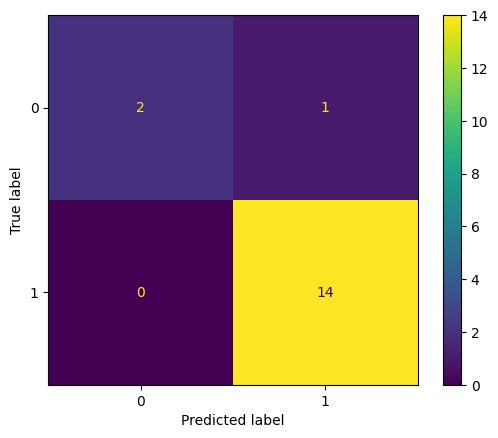


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.93      1.00      0.97        14

    accuracy                           0.94        17
   macro avg       0.97      0.83      0.88        17
weighted avg       0.95      0.94      0.94        17

Matriz de confusión:


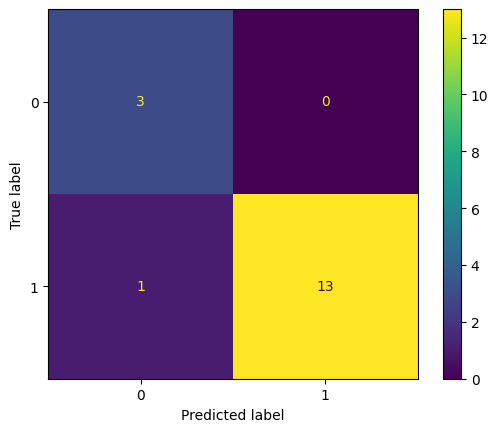


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.93      0.96        14

    accuracy                           0.94        17
   macro avg       0.88      0.96      0.91        17
weighted avg       0.96      0.94      0.94        17



In [7]:
main('../params.yaml')